<b>Author:</b>  Nico Calitz

# Convert Wavelength to RGB

From : http://codingmess.blogspot.co.za/2009/05/conversion-of-wavelength-in-nanometers.html

Code was taken form http://www.midnightkite.com/color.html, where the original code is written in FORTRAN.

In [24]:
# enable retina plots (only for retina-enable mac)
%config InlineBackend.figure_format = 'retina'

# extension installed uding the command: 'pip install version_information'
# see usage at bottom of notebook
%load_ext version_information

The version_information extension is already loaded. To reload it, use:
  %reload_ext version_information


## Function:

In [25]:
def wav2rgb(wavelength):
    w = int(wavelength)

    # colour
    if w >= 380 and w < 440:
        R = -(w - 440.) / (440. - 380.)
        G = 0.0
        B = 1.0
    elif w >= 440 and w < 490:
        R = 0.0
        G = (w - 440.) / (490. - 440.)
        B = 1.0
    elif w >= 490 and w < 510:
        R = 0.0
        G = 1.0
        B = -(w - 510.) / (510. - 490.)
    elif w >= 510 and w < 580:
        R = (w - 510.) / (580. - 510.)
        G = 1.0
        B = 0.0
    elif w >= 580 and w < 645:
        R = 1.0
        G = -(w - 645.) / (645. - 580.)
        B = 0.0
    elif w >= 645 and w <= 780:
        R = 1.0
        G = 0.0
        B = 0.0
    else:
        R = 0.0
        G = 0.0
        B = 0.0

    # intensity correction
    if w >= 380 and w < 420:
        SSS = 0.3 + 0.7*(w - 380) / (420 - 380)
    elif w >= 420 and w <= 700:
        SSS = 1.0
    elif w > 700 and w <= 780:
        SSS = 0.3 + 0.7*(780 - w) / (780 - 700)
    else:
        SSS = 0.0
    #SSS *= 255

    #return (int(SSS*R), int(SSS*G), int(SSS*B))
    return (SSS*R, SSS*G, SSS*B)

## Plot: RGB values (normalized) as a function of wavelength

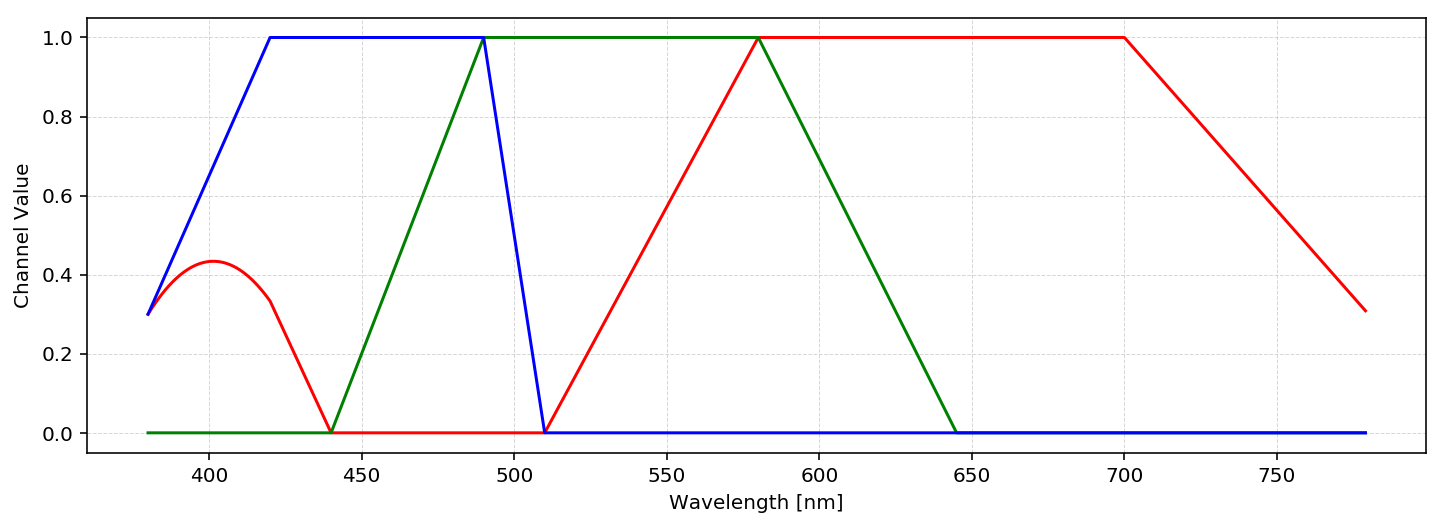

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# generate RGB data for each wavelength
wavelength_range = range(380, 780, 1)
raw_color_data = []
for wavelength in wavelength_range:
    raw_color_data.append(wav2rgb(wavelength))
color_data = np.array(raw_color_data)

fig, ax = plt.subplots(figsize=(12,4))
ax.plot(wavelength_range, color_data[:,0], color='r')
ax.plot(wavelength_range, color_data[:,1], color='g')
ax.plot(wavelength_range, color_data[:,2], color='b')

ax.grid(linewidth=0.5, linestyle='dashed', alpha=0.5)
ax.set(xlabel='Wavelength [nm]', ylabel='Channel Value')

plt.show()

## Generate colormap from color data
Source: https://stackoverflow.com/questions/44959955/matplotlib-color-under-curve-based-on-spectral-color

The code below maps the color spectrum to a colormap.

In [28]:
import matplotlib as mpl

# clim corresponds to the wavelength limits of the wav2rgb() function
clim = (380, 780)

# ----- This code does not seem to be necessary, not sure why its included -----
# norm = plt.Normalize(*clim)
# wave = np.arange(clim[0],clim[1])
# wave_norm = np.array([norm(wave)])
# colorlist = np.concatenate((wave_norm.T, color_data/256), axis=1)

# create a LinearSegmentedColormap from the generated color data (N -> Quantization Levels)
spectralmap = mpl.colors.LinearSegmentedColormap.from_list(name='new-spectral', colors=color_data, 
                                                           N=256, gamma=1.0)

## Plot colormap for various resolutions

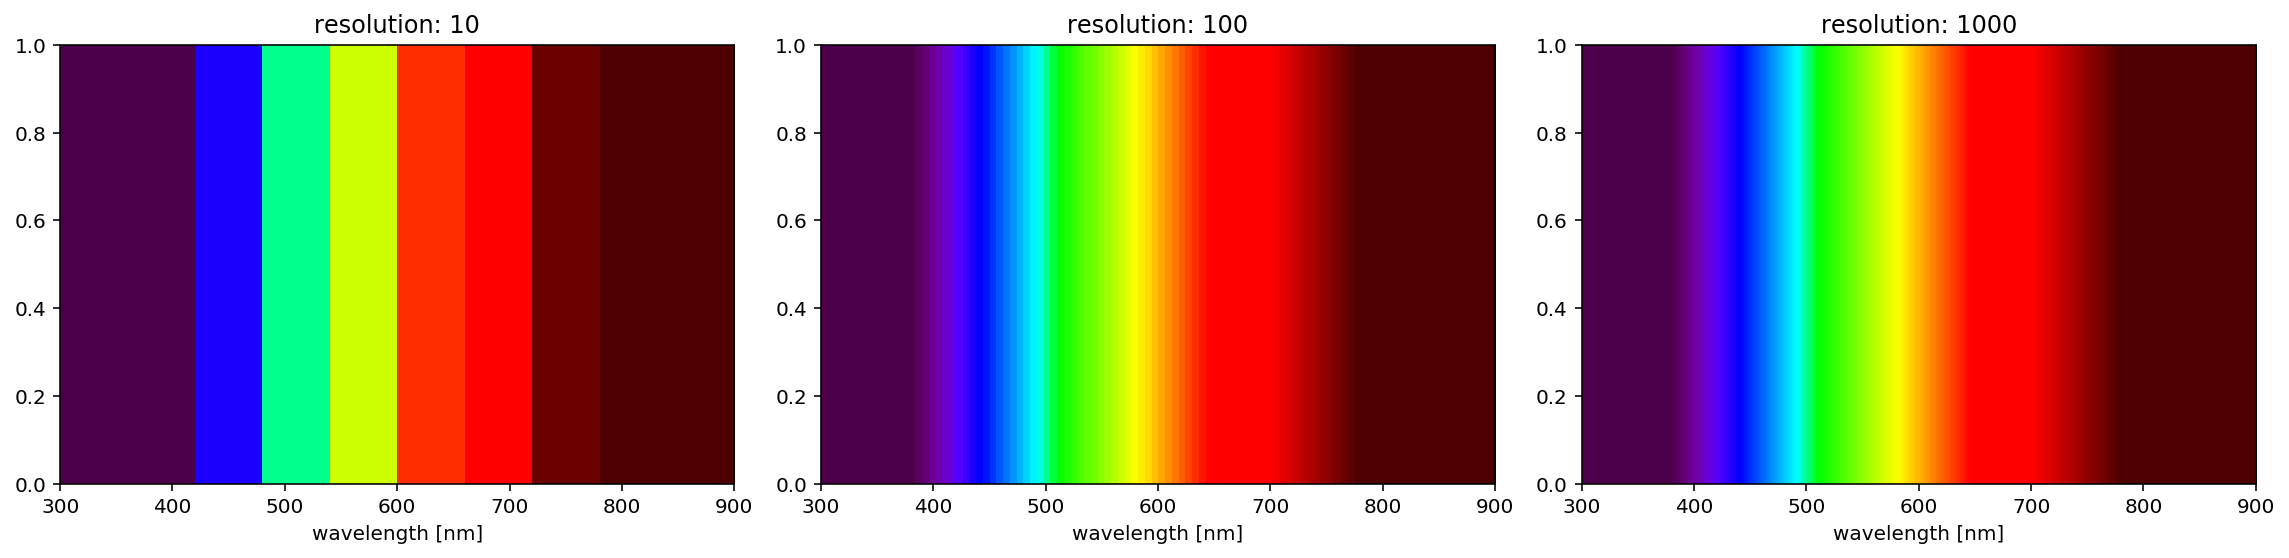

In [29]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,4))

for num, resolution in enumerate([10, 100, 1000]):
    wavelengths = np.linspace(300, 900, resolution)
    extent=(np.min(wavelengths), np.max(wavelengths), 0, 1)
    # note that 'clim' must correspond to the wavelength range used to generate the colormap data
    axes[num].imshow(np.vstack((wavelengths,)), clim=clim,  extent=extent, cmap=spectralmap, aspect='auto')
    axes[num].set(xlabel='wavelength [nm]', title='resolution: {0}'.format(resolution))
plt.tight_layout()
plt.show()

## Plot Overlay: RGB as a function of wavelength vs colormap

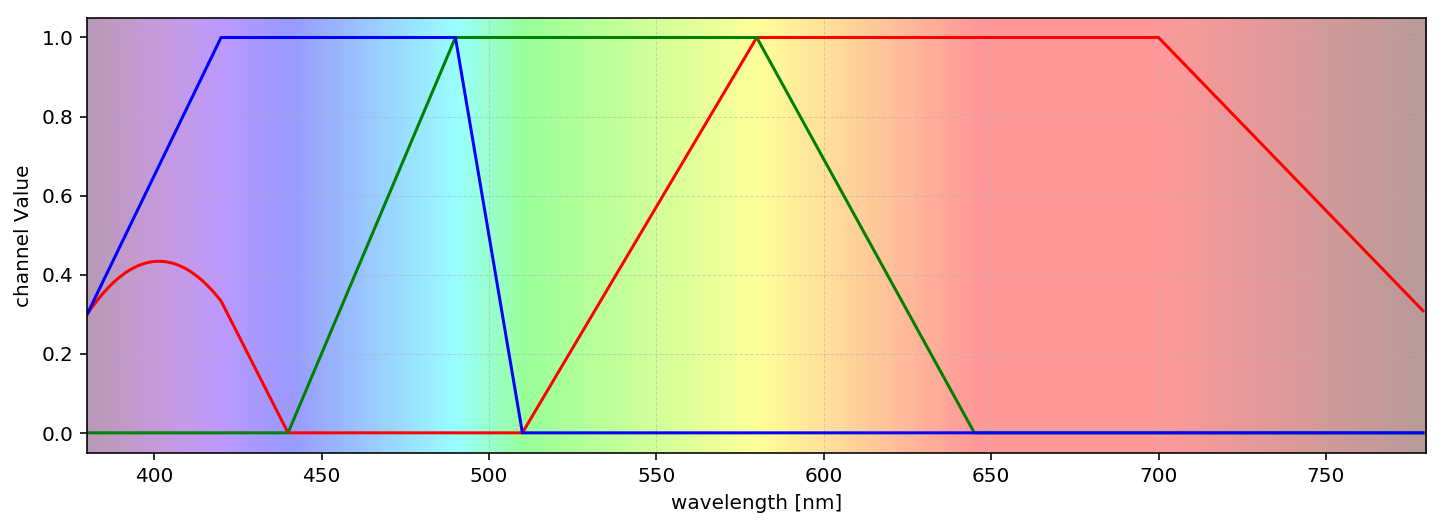

In [30]:
y_range = (-0.05, 1.05)

fig, ax = plt.subplots(figsize=(12,4))
wavelengths = np.linspace(380, 780, 1000)
extent = (np.min(wavelengths), np.max(wavelengths), y_range[0], y_range[1])
ax.imshow(np.vstack((wavelengths,)), clim=(380,780),  extent=extent, cmap=spectralmap, aspect='auto', alpha=0.4)
ax.plot(wavelength_range, color_data[:,0], color='r')
ax.plot(wavelength_range, color_data[:,1], color='g')
ax.plot(wavelength_range, color_data[:,2], color='b')
ax.set(xlabel='wavelength [nm]', ylabel='channel Value')
ax.grid(linewidth=0.5, linestyle='dashed', alpha=0.5)
plt.show()

## Traceability

In [31]:
%version_information numpy, matplotlib, jupyter, version_information

Software versions
Python 3.6.1 64bit [GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]
IPython 5.3.0
OS Darwin 16.7.0 x86_64 i386 64bit
numpy 1.12.1
matplotlib 2.0.2
jupyter 1.0.0
version_information 1.0.3
Sat Nov 04 18:39:02 2017 SAST